In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost as xgb

%matplotlib inline

np.random.seed(5)

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, log_loss
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,count_floors_pre_eq,age,height,L1,L2,F1,F2,F3,F4,has_superstructure_adobe_mud,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
0,0.125,0.125,0.096774,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0.250,0.075,0.129032,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0.000,0.100,0.032258,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
3,0.125,0.025,0.064516,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0.250,0.000,0.161290,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
count_floors_pre_eq                       10000 non-null float64
age                                       10000 non-null float64
height                                    10000 non-null float64
L1                                        10000 non-null int64
L2                                        10000 non-null int64
F1                                        10000 non-null int64
F2                                        10000 non-null int64
F3                                        10000 non-null int64
F4                                        10000 non-null int64
has_superstructure_adobe_mud              10000 non-null int64
has_superstructure_mud_mortar_stone       10000 non-null int64
has_superstructure_stone_flag             10000 non-null int64
has_superstructure_cement_mortar_stone    10000 non-null int64
has_superstructure_mud_mortar_brick       10000 non-null int64
has_

In [5]:
df.shape

(10000, 21)

In [6]:
df.corr()

,count_floors_pre_eq,age,height,L1,L2,F1,F2,F3,F4,has_superstructure_adobe_mud,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
count_floors_pre_eq,1.000000,0.266738,0.771249,-0.039791,0.053204,0.039058,-0.092458,-0.139883,-0.035451,0.191729,...,-0.046939,-0.022753,0.248462,-0.088173,-0.062758,-0.081937,0.014083,0.052102,-0.012307,0.112296
age,0.266738,1.000000,0.196161,-0.010735,0.017908,-0.127851,-0.062623,-0.129352,-0.010662,0.206699,...,0.016219,-0.056352,0.243643,-0.105810,-0.037056,-0.060589,-0.075111,-0.079812,-0.011734,0.120480
height,0.771249,0.196161,1.000000,-0.029204,0.044081,0.161826,-0.026559,-0.109483,-0.012387,0.170447,...,-0.021707,0.007318,0.216115,0.009788,-0.054900,-0.079032,0.094436,0.133341,-0.009030,0.031728
L1,-0.039791,-0.010735,-0.029204,1.000000,-0.873332,-0.020032,-0.026333,-0.000968,-0.018853,-0.007574,...,0.030789,0.003228,-0.030517,-0.061426,0.033145,0.012764,-0.004012,-0.021425,0.044982,-0.008097
L2,0.053204,0.017908,0.044081,-0.873332,1.000000,0.019506,0.034314,-0.023681,0.019723,0.027558,...,-0.035259,-0.011552,0.044503,0.063252,-0.050416,-0.024415,0.006211,0.028160,-0.045694,0.007512
F1,0.039058,-0.127851,0.161826,-0.020032,0.019506,1.000000,-0.045284,-0.049086,-0.013651,-0.061703,...,-0.031406,0.108106,-0.040903,0.238469,-0.102016,-0.057208,0.509956,0.538391,-0.005581,-0.262966
F2,-0.092458,-0.062623,-0.026559,-0.026333,0.034314,-0.045284,1.000000,-0.057531,-0.016000,-0.053123,...,-0.013606,0.195611,0.004198,0.409767,-0.043015,-0.035877,0.057943,0.011930,-0.004289,-0.133999
F3,-0.139883,-0.129352,-0.109483,-0.000968,-0.023681,-0.049086,-0.057531,1.000000,-0.017343,-0.060524,...,-0.013867,-0.025405,-0.059474,0.002367,0.327165,0.327151,-0.022752,-0.029540,0.024259,-0.171044
F4,-0.035451,-0.010662,-0.012387,-0.018853,0.019723,-0.013651,-0.016000,-0.017343,1.000000,0.003516,...,0.132228,0.000933,0.003988,0.019640,0.038807,0.009158,-0.006793,-0.008215,0.114410,-0.030599
has_superstructure_adobe_mud,0.191729,0.206699,0.170447,-0.007574,0.027558,-0.061703,-0.053123,-0.060524,0.003516,1.000000,...,0.029136,-0.010363,0.330837,-0.035132,0.010646,0.018970,-0.031931,-0.034133,0.060409,0.055371


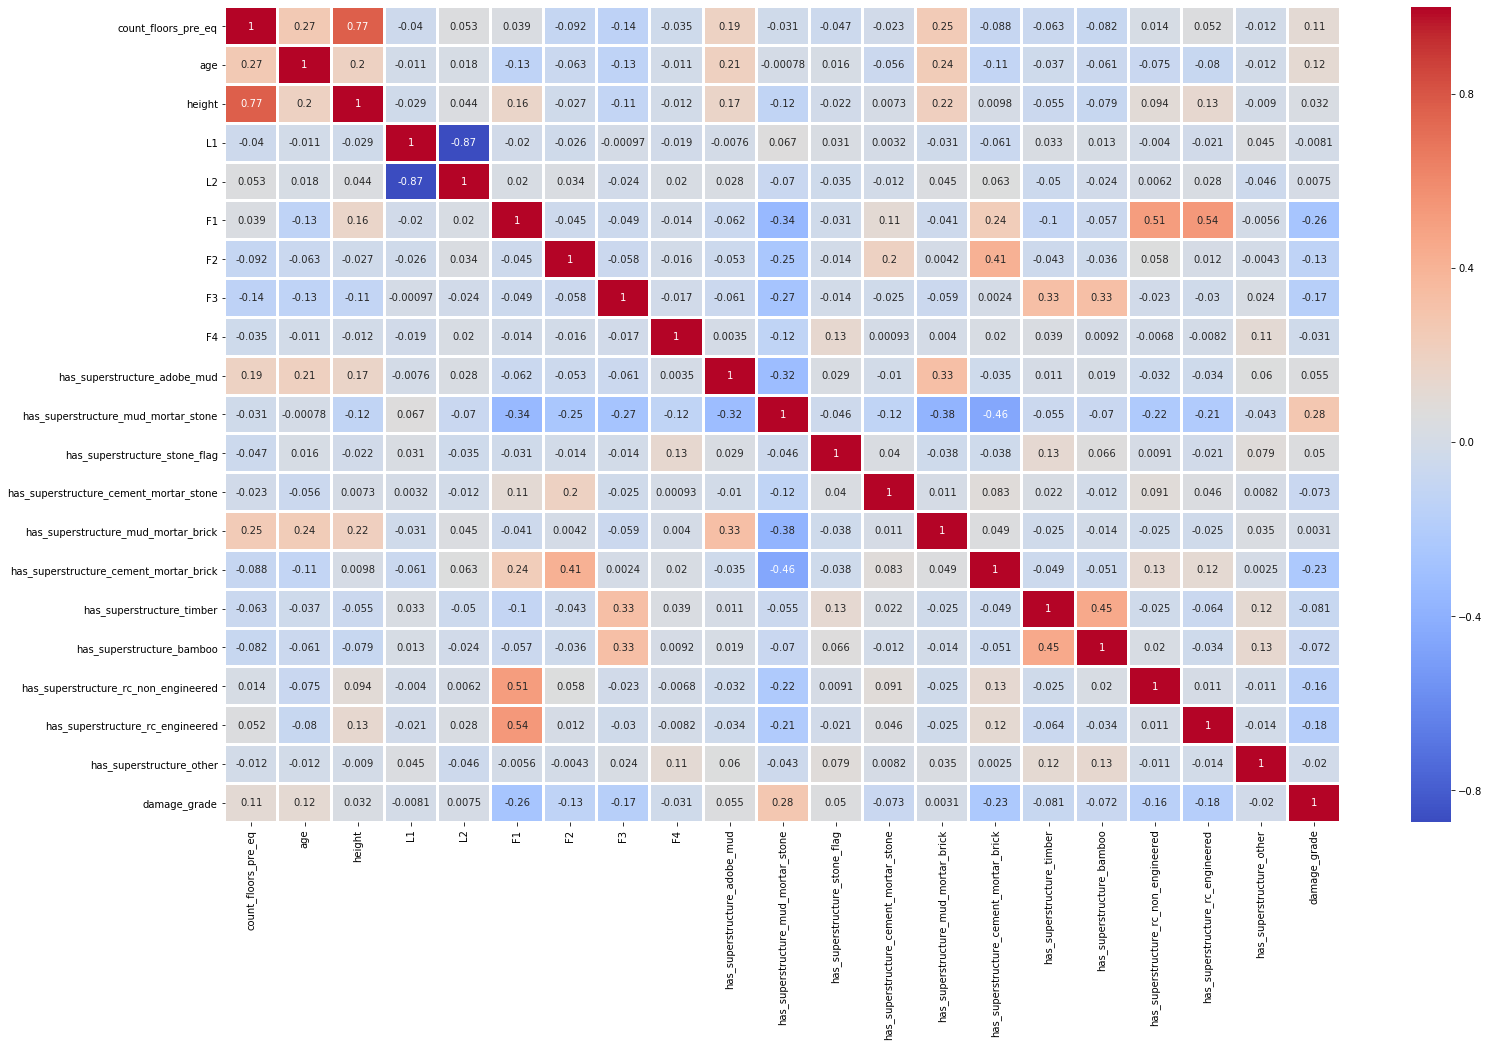

In [7]:
plt.figure(figsize=(25,15))
sns.heatmap(data=df.corr(),cmap="coolwarm",annot=True,fmt='.2g',linewidths=2)
plt.show()

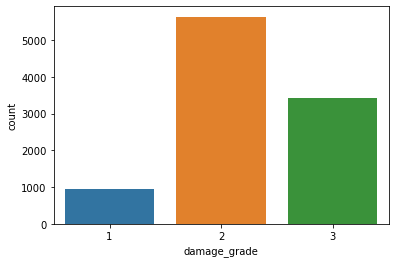

In [8]:
sns.countplot(x='damage_grade', data=df)
plt.show()

### Sample a fraction for hyperparameter tuning

In [9]:
df_sample = df.sample(frac=0.1, random_state=5)

In [10]:
df_sample

,count_floors_pre_eq,age,height,L1,L2,F1,F2,F3,F4,has_superstructure_adobe_mud,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
7054,0.125,0.125,0.129032,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
442,0.125,0.100,0.129032,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,2
3954,0.125,0.025,0.129032,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2288,0.000,0.025,0.064516,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
3196,0.125,1.000,0.096774,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7236,0.125,0.050,0.129032,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
3777,0.250,0.025,0.096774,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7419,0.125,0.075,0.064516,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
7914,0.125,0.150,0.096774,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


### Split data into train, validation and test sets

In [11]:
X = df_sample.iloc[:,0:20]
y = df_sample.iloc[:,20]

In [12]:
X.head()

,count_floors_pre_eq,age,height,L1,L2,F1,F2,F3,F4,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
7054,0.125,0.125,0.129032,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
442,0.125,0.100,0.129032,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3954,0.125,0.025,0.129032,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2288,0.000,0.025,0.064516,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3196,0.125,1.000,0.096774,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [13]:
y.head()

7054    2
442     2
3954    3
2288    2
3196    3
Name: damage_grade, dtype: int64

In [14]:
X.values, y.values

(array([[0.125     , 0.125     , 0.12903226, ..., 0.        , 0.        ,
         0.        ],
        [0.125     , 0.1       , 0.12903226, ..., 0.        , 0.        ,
         0.        ],
        [0.125     , 0.025     , 0.12903226, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.125     , 0.075     , 0.06451613, ..., 0.        , 0.        ,
         0.        ],
        [0.125     , 0.15      , 0.09677419, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.06451613, ..., 0.        , 0.        ,
         0.        ]]),
 array([2, 2, 3, 2, 3, 2, 1, 2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2,
        1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 3, 1, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2,
        2, 2, 3, 2, 3, 3, 2, 3, 2, 2, 3, 1, 1, 3, 2, 1, 2, 3, 2, 1, 2, 2,
        3, 3, 2, 2, 3, 3, 1, 3, 3, 2, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3,
        3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2

### Baseline GBC model using sample size of 10%

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [16]:
X_train.shape, y_train.shape

((800, 20), (800,))

In [17]:
X_test.shape, y_test.shape

((200, 20), (200,))

In [18]:
gbc_sample = GradientBoostingClassifier()

In [19]:
gbc_sample.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [20]:
gbc_pred_sample = gbc_sample.predict(X_test)
gbc_pred_sample

array([2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 3,
       2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 3, 3,
       2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 1, 2, 3,
       3, 3], dtype=int64)

In [21]:
gbc_pred_sample_proba = gbc_sample.predict_proba(X_test)
gbc_pred_sample_proba

array([[0.03161052, 0.89010495, 0.07828453],
       [0.02203148, 0.50164716, 0.47632137],
       [0.02022609, 0.52598797, 0.45378594],
       [0.28180355, 0.59356447, 0.12463198],
       [0.01297578, 0.45751542, 0.5295088 ],
       [0.0214841 , 0.74104496, 0.23747094],
       [0.01284977, 0.87129551, 0.11585472],
       [0.00984949, 0.59921883, 0.39093168],
       [0.01595744, 0.6369634 , 0.34707915],
       [0.02022609, 0.52598797, 0.45378594],
       [0.01389265, 0.54135544, 0.44475191],
       [0.0216598 , 0.5993952 , 0.378945  ],
       [0.01619758, 0.50161831, 0.48218412],
       [0.33165241, 0.65783725, 0.01051034],
       [0.05320724, 0.53611945, 0.4106733 ],
       [0.0206502 , 0.53701694, 0.44233286],
       [0.87132704, 0.08652745, 0.0421455 ],
       [0.08014326, 0.67749405, 0.24236268],
       [0.02415144, 0.54119718, 0.43465138],
       [0.57109046, 0.39232996, 0.03657958],
       [0.08673769, 0.61469384, 0.29856847],
       [0.01929699, 0.60467911, 0.3760239 ],
       [0.

In [22]:
print('Accuracy Score:', accuracy_score(y_test,gbc_pred_sample))
print('F1 Score:',f1_score(y_test,gbc_pred_sample,average='micro'))
print('Precision Score:',precision_score(y_test,gbc_pred_sample,average='micro'))
print('Recall Score:',recall_score(y_test,gbc_pred_sample,average='micro'))
print('Log Loss:',log_loss(y_test,gbc_pred_sample_proba))

Accuracy Score: 0.52
F1 Score: 0.52
Precision Score: 0.52
Recall Score: 0.52
Log Loss: 0.9910260972795072


In [23]:
print(classification_report(y_test,gbc_pred_sample))

              precision    recall  f1-score   support

           1       0.71      0.22      0.33        23
           2       0.55      0.77      0.65       111
           3       0.34      0.20      0.25        66

    accuracy                           0.52       200
   macro avg       0.54      0.40      0.41       200
weighted avg       0.50      0.52      0.48       200



### Baseline XGBoost Classifier model using sample size of 20%

In [24]:
xgc_sample = xgb.XGBClassifier(objective='multi:softprob',random_state=5)

In [25]:
xgc_sample.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [26]:
xgc_pred_sample = xgc_sample.predict(X_test)
xgc_pred_sample

array([2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3,
       3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2], dtype=int64)

In [27]:
xgc_pred_sample_proba = xgc_sample.predict_proba(X_test)
xgc_pred_sample_proba

array([[0.04198956, 0.8941058 , 0.06390458],
       [0.02634756, 0.5146029 , 0.45904952],
       [0.02716696, 0.5454818 , 0.42735124],
       [0.6298495 , 0.30262837, 0.06752212],
       [0.01526221, 0.4874655 , 0.49727225],
       [0.02752766, 0.608688  , 0.36378437],
       [0.01719989, 0.8997065 , 0.08309358],
       [0.01879236, 0.5571066 , 0.42410102],
       [0.02057808, 0.6142822 , 0.36513972],
       [0.02716696, 0.5454818 , 0.42735124],
       [0.02121439, 0.6023551 , 0.37643048],
       [0.02832452, 0.5701012 , 0.40157428],
       [0.02555426, 0.54501015, 0.42943558],
       [0.5076787 , 0.41082376, 0.08149756],
       [0.04832343, 0.5083295 , 0.44334707],
       [0.02716696, 0.5454818 , 0.42735124],
       [0.63711715, 0.21233031, 0.15055253],
       [0.10964718, 0.65944767, 0.23090522],
       [0.02190789, 0.54047453, 0.43761757],
       [0.5365559 , 0.43890122, 0.0245429 ],
       [0.08617404, 0.60977155, 0.3040544 ],
       [0.02657331, 0.57112867, 0.402298  ],
       [0.

In [28]:
print('Accuracy Score:', accuracy_score(y_test,xgc_pred_sample))
print('F1 Score:',f1_score(y_test,xgc_pred_sample,average='micro'))
print('Precision Score:',precision_score(y_test,xgc_pred_sample,average='micro'))
print('Recall Score:',recall_score(y_test,xgc_pred_sample,average='micro'))
print('Log Loss:',log_loss(y_test,xgc_pred_sample_proba))

Accuracy Score: 0.525
F1 Score: 0.525
Precision Score: 0.525
Recall Score: 0.525
Log Loss: 0.9356902419030666


In [29]:
print(classification_report(y_test,xgc_pred_sample))

              precision    recall  f1-score   support

           1       0.33      0.09      0.14        23
           2       0.55      0.88      0.68       111
           3       0.33      0.08      0.12        66

    accuracy                           0.53       200
   macro avg       0.40      0.35      0.31       200
weighted avg       0.45      0.53      0.43       200



In [30]:
xgc_sample.feature_importances_

array([0.01806916, 0.02468215, 0.03158427, 0.03530367, 0.03462412,
       0.06916451, 0.03367497, 0.03968594, 0.0172504 , 0.0694311 ,
       0.23789324, 0.03019999, 0.02791592, 0.10247468, 0.08863985,
       0.02594706, 0.02347544, 0.0398797 , 0.02869391, 0.02140991],
      dtype=float32)

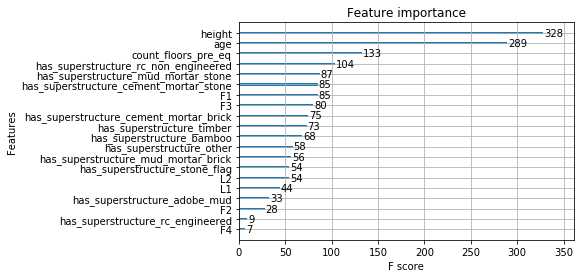

In [46]:
plot_importance(xgc_sample)
plt.show()

### Conclusion: Both models gives almost similar results

### Hence tune only GradientBoosting Classifier

### Use Randomized Search CV

In [32]:
grid = {'loss':['deviance', 'exponential'],
        'learning_rate': np.arange(0.5,2.0,0.2),
        'n_estimators': np.arange(10,500,50),
        'min_samples_split': np.arange(2,20,2),
        'min_samples_leaf': np.arange(1,20,2),
        'max_depth': np.arange(1,20,1),
        'max_features': np.arange(1,20,1)
       }

In [33]:
rs_gbc = RandomizedSearchCV(gbc_sample,param_distributions=grid,n_iter=20,n_jobs=-1,cv=5,verbose=2, random_state=5)

In [34]:
rs_gbc.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   37.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [35]:
rs_gbc.best_params_

{'n_estimators': 110,
 'min_samples_split': 6,
 'min_samples_leaf': 9,
 'max_features': 9,
 'max_depth': 1,
 'loss': 'deviance',
 'learning_rate': 1.0999999999999999}

In [36]:
rs_pred = rs_gbc.predict(X_test)
rs_pred 

array([2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3,
       3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3,
       2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 3, 1, 2, 3, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 3, 3,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 3], dtype=int64)

In [37]:
print('Accuracy Score:', accuracy_score(y_test,rs_pred))
print('F1 Score:',f1_score(y_test,rs_pred,average='micro'))
print('Precision Score:',precision_score(y_test,rs_pred,average='micro'))
print('Recall Score:',recall_score(y_test,rs_pred,average='micro'))
#print('Log Loss:',log_loss(y_test,gbc_pred_sample_proba))

Accuracy Score: 0.465
F1 Score: 0.465
Precision Score: 0.465
Recall Score: 0.465


In [38]:
print(classification_report(y_test,rs_pred))

              precision    recall  f1-score   support

           1       0.30      0.13      0.18        23
           2       0.52      0.72      0.61       111
           3       0.27      0.15      0.19        66

    accuracy                           0.47       200
   macro avg       0.36      0.33      0.33       200
weighted avg       0.41      0.47      0.42       200



### Use Grid Search CV

In [39]:
gs_grid = {'loss':['deviance'],
        'learning_rate': np.arange(0.9,1.3,0.2),
        'n_estimators': np.arange(100,150,10),
        'min_samples_split': np.arange(6,10,2),
        'min_samples_leaf': np.arange(8,11,1),
        'max_depth': np.arange(1,3,1),
        'max_features': np.arange(8,10,1)
       }

In [40]:
gs_gbc = GridSearchCV(estimator=gbc_sample,param_grid=gs_grid,scoring='f1_micro',n_jobs=-1,cv=5,verbose=True)

In [41]:
gs_gbc.fit(X_train,y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  3.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
             iid=

In [42]:
gs_gbc.best_params_

{'learning_rate': 0.9,
 'loss': 'deviance',
 'max_depth': 1,
 'max_features': 8,
 'min_samples_leaf': 8,
 'min_samples_split': 6,
 'n_estimators': 100}

### Best hyperparameters

- 'learning_rate': 1.1,
- 'loss': 'deviance',
- 'max_depth': 1,
- 'max_features': 8,
- 'min_samples_leaf': 10,
- 'min_samples_split': 8,
- 'n_estimators': 110

In [47]:
gs_pred = gs_gbc.predict(X_test)
gs_pred 

array([2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3,
       3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 3,
       2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 3, 1, 2, 3, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 3, 3,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2,
       2, 3], dtype=int64)

In [48]:
print('Accuracy Score:', accuracy_score(y_test,gs_pred))
print('F1 Score:',f1_score(y_test,gs_pred,average='micro'))
print('Precision Score:',precision_score(y_test,gs_pred,average='micro'))
print('Recall Score:',recall_score(y_test,gs_pred,average='micro'))
#print('Log Loss:',log_loss(y_test,gbc_pred_sample_proba))

Accuracy Score: 0.475
F1 Score: 0.47500000000000003
Precision Score: 0.475
Recall Score: 0.475


In [49]:
print(classification_report(y_test,gs_pred))

              precision    recall  f1-score   support

           1       0.40      0.17      0.24        23
           2       0.53      0.73      0.61       111
           3       0.27      0.15      0.19        66

    accuracy                           0.48       200
   macro avg       0.40      0.35      0.35       200
weighted avg       0.43      0.47      0.43       200



### Cross-validation

### Split data into train, validation and test sets

In [50]:
df.shape

(10000, 21)

In [51]:
X = df.iloc[:,0:20]
y = df.iloc[:,20]

In [52]:
X.head()

,count_floors_pre_eq,age,height,L1,L2,F1,F2,F3,F4,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
0,0.125,0.125,0.096774,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0.250,0.075,0.129032,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0.000,0.100,0.032258,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,0.125,0.025,0.064516,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0.250,0.000,0.161290,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [53]:
y.head()

0    2
1    3
2    2
3    2
4    3
Name: damage_grade, dtype: int64

In [54]:
X.shape, y.shape

((10000, 20), (10000,))

In [55]:
X.values, y.values

(array([[0.125     , 0.125     , 0.09677419, ..., 0.        , 0.        ,
         0.        ],
        [0.25      , 0.075     , 0.12903226, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.1       , 0.03225807, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.125     , 0.075     , 0.12903226, ..., 0.        , 0.        ,
         0.        ],
        [0.125     , 0.1       , 0.16129032, ..., 0.        , 0.        ,
         0.        ],
        [0.125     , 0.2       , 0.06451613, ..., 0.        , 0.        ,
         0.        ]]), array([2, 3, 2, ..., 2, 3, 2], dtype=int64))

In [56]:
#Create the final model with best hyperparameter

gbc_final = GradientBoostingClassifier(loss='deviance',learning_rate=1.1,n_estimators=110,
                                       min_samples_split=8, min_samples_leaf=10, max_depth=1, max_features=8,
                                       random_state=5, verbose=True, validation_fraction=0.2,
                                       n_iter_no_change=5, tol=0.01)

In [57]:
cv_acc = cross_val_score(gbc_final,X,y,scoring='accuracy',cv=5,n_jobs=-1,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


In [58]:
cv_acc

array([0.5715, 0.5865, 0.5665, 0.5615, 0.5795])

In [59]:
cv_acc_avg = np.mean(cv_acc)
cv_acc_avg

0.5730999999999999

In [60]:
cv_f1 = cross_val_score(gbc_final,X,y,scoring='f1_micro',cv=5,n_jobs=-1,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished


In [61]:
cv_f1

array([0.5715, 0.5865, 0.5665, 0.5615, 0.5795])

In [62]:
cv_f1_avg = np.mean(cv_f1)
cv_f1_avg

0.5730999999999999

### Train the final model and predict

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [64]:
X_train.shape, X_test.shape

((8000, 20), (2000, 20))

In [65]:
y_train.shape, y_test.shape

((8000,), (2000,))

In [66]:
gbc_final = GradientBoostingClassifier(loss='deviance',learning_rate=1.1,n_estimators=110,
                                       min_samples_split=8, min_samples_leaf=10, max_depth=1, max_features=8,
                                       random_state=5, verbose=True, validation_fraction=0.2,
                                       n_iter_no_change=5, tol=0.01)

In [67]:
gbc_final.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1        5568.3683            0.00s
         2        5425.0510            1.69s
         3        5341.8304            1.11s
         4        5286.7197            1.24s
         5        5253.3694            1.31s
         6        5235.5279            1.08s
         7        5223.3888            1.15s
         8        5212.4146            1.00s
         9        5201.1373            1.12s
        10        5194.6670            1.00s
        20        5136.6256            0.80s


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.1, loss='deviance', max_depth=1,
                           max_features=8, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=10, min_samples_split=8,
                           min_weight_fraction_leaf=0.0, n_estimators=110,
                           n_iter_no_change=5, presort='deprecated',
                           random_state=5, subsample=1.0, tol=0.01,
                           validation_fraction=0.2, verbose=True,
                           warm_start=False)

In [68]:
gbc_final_pred = gbc_final.predict(X_test)
gbc_final_pred

array([2, 2, 2, ..., 3, 2, 3], dtype=int64)

In [69]:
gbc_final_pred_proba = gbc_final.predict_proba(X_test)
gbc_final_pred_proba

array([[0.03541801, 0.57554611, 0.38903588],
       [0.05378135, 0.6821458 , 0.26407285],
       [0.05528908, 0.58393664, 0.36077428],
       ...,
       [0.01047264, 0.4669876 , 0.52253976],
       [0.02756489, 0.53979572, 0.43263939],
       [0.05388574, 0.4176825 , 0.52843176]])

### Model Evaluation

In [70]:
print('Accuracy Score:', accuracy_score(y_test,gbc_final_pred))
print('F1 Score:',f1_score(y_test,gbc_final_pred,average='micro'))
print('Precision Score:',precision_score(y_test,gbc_final_pred,average='micro'))
print('Recall Score:',recall_score(y_test,gbc_final_pred,average='micro'))
print('Log Loss:',log_loss(y_test,gbc_final_pred_proba))

Accuracy Score: 0.5605
F1 Score: 0.5605
Precision Score: 0.5605
Recall Score: 0.5605
Log Loss: 0.8085008525401792


In [71]:
print(classification_report(y_test,gbc_final_pred))

              precision    recall  f1-score   support

           1       0.61      0.28      0.39       191
           2       0.58      0.82      0.68      1117
           3       0.47      0.21      0.29       692

    accuracy                           0.56      2000
   macro avg       0.55      0.44      0.45      2000
weighted avg       0.54      0.56      0.52      2000



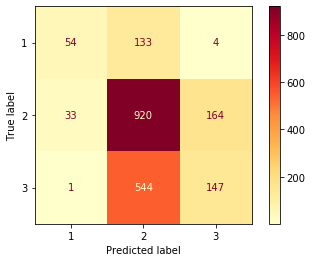

In [72]:
plot_confusion_matrix(gbc_final,X_test,y_test,values_format='.3g',cmap='YlOrRd')
plt.show()

### Load test set

In [73]:
dftest = pd.read_csv("test.csv")

In [74]:
dftest.head()

,count_floors_pre_eq,age,height,L1,L2,F1,F2,F3,F4,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
0,0.250,0.100,0.161290,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0.125,0.125,0.129032,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0.125,0.025,0.129032,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0.000,0.000,0.064516,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0.250,0.075,0.193548,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [75]:
gbc_final = GradientBoostingClassifier(loss='deviance',learning_rate=1.1,n_estimators=110,
                                       min_samples_split=8, min_samples_leaf=10, max_depth=1, max_features=8,
                                       random_state=5, verbose=True, validation_fraction=0.2,
                                       n_iter_no_change=5, tol=0.01)

In [76]:
gbc_final.fit(X,y)

      Iter       Train Loss   Remaining Time 
         1        6956.7080            1.70s
         2        6790.8909            1.69s
         3        6704.3892            1.67s
         4        6633.6311            1.66s
         5        6593.0788            1.64s
         6        6564.9408            1.62s
         7        6548.9011            1.47s
         8        6526.9580            1.48s
         9        6511.6546            1.48s
        10        6500.5631            1.47s
        20        6426.2482            1.18s


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.1, loss='deviance', max_depth=1,
                           max_features=8, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=10, min_samples_split=8,
                           min_weight_fraction_leaf=0.0, n_estimators=110,
                           n_iter_no_change=5, presort='deprecated',
                           random_state=5, subsample=1.0, tol=0.01,
                           validation_fraction=0.2, verbose=True,
                           warm_start=False)

In [77]:
gbc_final_pred = gbc_final.predict(dftest)
gbc_final_pred

array([3, 2, 2, ..., 2, 2, 2], dtype=int64)

In [78]:
gbc_final_pred_proba = gbc_final.predict_proba(dftest)
gbc_final_pred_proba

array([[0.02563428, 0.47584944, 0.49851628],
       [0.04219585, 0.57359112, 0.38421304],
       [0.04770162, 0.60967505, 0.34262333],
       ...,
       [0.0316433 , 0.54824268, 0.42011402],
       [0.01767634, 0.60493548, 0.37738818],
       [0.20708316, 0.67495766, 0.11795917]])

In [79]:
result = pd.DataFrame(data=gbc_final_pred,columns=['damage_grade'])

In [80]:
result

,damage_grade
0,3
1,2
2,2
3,1
4,3
...,...
86863,2
86864,3
86865,2
86866,2


In [81]:
#Save results to csv
#result.to_csv("result.csv",index=False)

### OPTIONAL: Split data into 3 parts and train on X_valid Data

### X_train = 80%, X_valid = 10%, X_test = 10%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10)

In [ ]:
X_train.shape, y_train.shape

In [ ]:
X_test.shape, y_test.shape

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.12)

In [ ]:
X_train.shape, y_train.shape

In [ ]:
X_val.shape, y_val.shape

#####  ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Baseline model (For Reference only)

In [ ]:
gbc1 = GradientBoostingClassifier()

In [ ]:
gbc1.fit(X_train,y_train)

In [ ]:
y_pred1 = gbc1.predict(X_val)
y_pred1

In [ ]:
y_pred1proba = gbc1.predict_proba(X_val)
y_pred1proba

In [ ]:
print(accuracy_score(y_val,y_pred1))
print(f1_score(y_val,y_pred1,average='micro'))
print(precision_score(y_val,y_pred1,average='micro'))
print(recall_score(y_val,y_pred1,average='micro'))
print(log_loss(y_val,y_pred1proba))

In [ ]:
print(classification_report(y_val,y_pred1))

### Using XGBoost model

In [ ]:
xgc = xgb.XGBClassifier(objective='multi:softprob')

In [ ]:
xgc.fit(X_train,y_train)

In [ ]:
xgc_pred1 = xgc.predict(X_val)
xgc_pred1

In [ ]:
print(accuracy_score(y_val,xgc_pred1))

In [ ]:
print(classification_report(y_val,xgc_pred1))

In [ ]:
print(accuracy_score(y_test,rs_pred))
print(f1_score(y_test,rs_pred,average='micro'))
print(precision_score(y_test,rs_pred,average='micro'))
print(recall_score(y_test,rs_pred,average='micro'))